In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'E:\ExcelR ass\Neural_Network\forestfires.csv')
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# New Section

In [7]:
# correlation :
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,-0.059396,-0.019637,-0.089517,0.071730,0.011225,0.093908,-0.117199,0.228103,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,-0.107921,-0.003653,0.025355,0.087672,0.000016,0.017939,-0.197543,0.497928,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,-0.052993,-0.035189,-0.001431,0.051859,0.028368,0.024803,-0.268211,0.279361,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,-0.158601,-0.038585,-0.003243,-0.022406,0.068610,0.125415,-0.106478,0.334639,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,-0.136529,0.034899,0.014403,0.051432,0.035630,0.090580,-0.157051,0.351404,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,0.009376,-0.023869,0.136220,-0.123061,-0.014211,-0.087508,0.021235,0.054761,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,-0.063881,-0.063799,0.027981,-0.062553,0.053396,-0.019965,0.048266,0.028577,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,-0.029945,-0.032271,-0.017872,-0.026798,0.139311,-0.020744,-0.009752,0.093101,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,-0.021206,0.087868,-0.020463,0.020121,-0.001333,-0.011452,-0.008280,-0.004187,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,-0.181293,-0.195372,-0.210462,-0.162237,-0.166728,-0.151487,-0.019140,-0.100837,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


In [3]:
# retreiving dummy variable columns for better analysis of data :
original_data = data.iloc[:,0:11]
# print(original_data.shape)     # (517, 11)
original_data.head()
original_data["size_category"] = data["size_category"]
print(original_data.shape)       # (517, 12)

(517, 12)


In [9]:
# check for null value :
original_data.isnull().sum()
# print(original_data.info)

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [10]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


<BarContainer object of 517 artists>

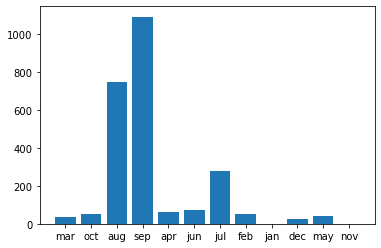

In [6]:
# visulizing affect on area base on categorical variable :
import matplotlib.pyplot as plt
# impact of month feature on fire area :
plt.bar(original_data["month"], original_data["area"])
# we can see that month september and august has recorded high fire area.

<BarContainer object of 517 artists>

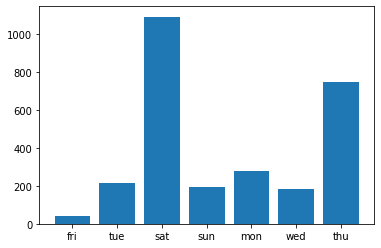

In [12]:
# impact on fire area by day feature :
plt.bar(original_data["day"], original_data["area"])
# we can see that day saturday and thursday has recorded high fire area.

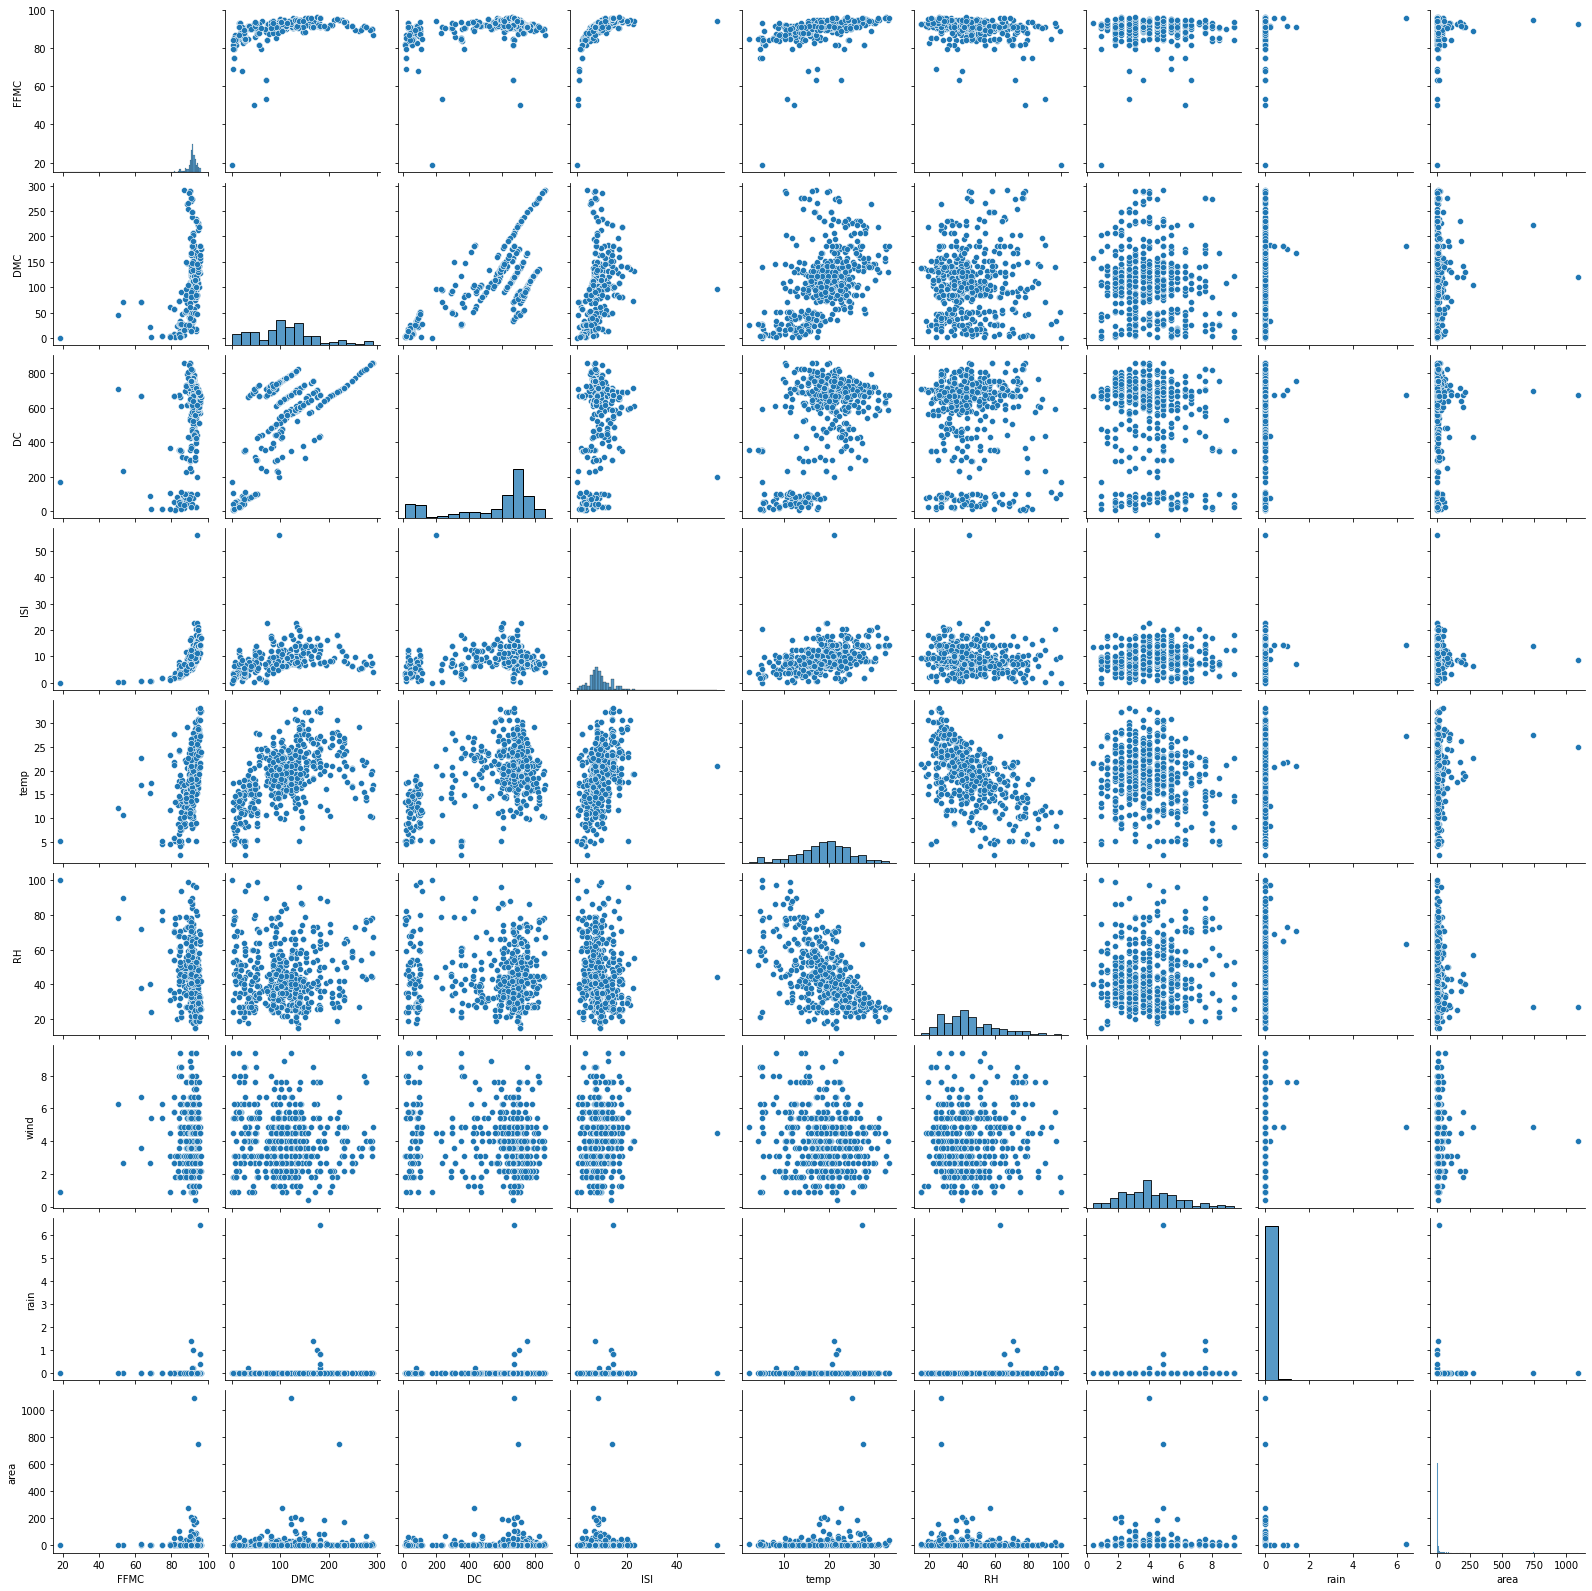

In [13]:
import seaborn as sns
sns.pairplot(original_data)

<BarContainer object of 517 artists>

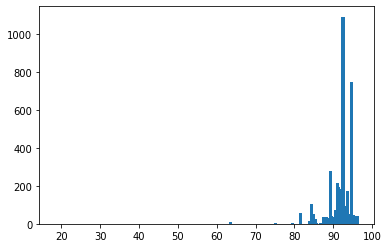

In [14]:
# impact of FFMC on area :
plt.bar(original_data["FFMC"], original_data["area"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f0f8b851278>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0f957cccc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0f8b2a0518>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0f8c04d710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0f8b09f278>,
  <matplotlib.lines.Line2D at 0x7f0f8b8fab00>]}

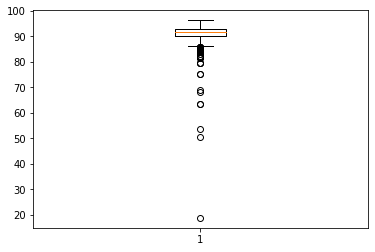

In [15]:
# to check  for outlier in FFMC feature :
plt.boxplot(original_data["FFMC"])

In [16]:
original_data["FFMC"]

0      86.2
1      90.6
2      90.6
3      91.7
4      89.3
       ... 
512    81.6
513    81.6
514    81.6
515    94.4
516    79.5
Name: FFMC, Length: 517, dtype: float64

In [17]:
# Remove out liers in FFMC :
original_data["FFMC"] = original_data["FFMC"].loc[original_data["FFMC"]>80]

In [18]:
original_data["FFMC"]

0      86.2
1      90.6
2      90.6
3      91.7
4      89.3
       ... 
512    81.6
513    81.6
514    81.6
515    94.4
516     NaN
Name: FFMC, Length: 517, dtype: float64

In [19]:
# now check for null value after removing outliers in FFMC feature :
original_data.isnull().sum()

month             0
day               0
FFMC             12
DMC               0
DC                0
ISI               0
temp              0
RH                0
wind              0
rain              0
area              0
size_category     0
dtype: int64

In [20]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           505 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [4]:
# similarly for every numerical columns in original_data set :
numerical = [var for var in original_data.columns if original_data[var].dtype != 'O']
numerical

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

Text(0.5, 0, "['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']")

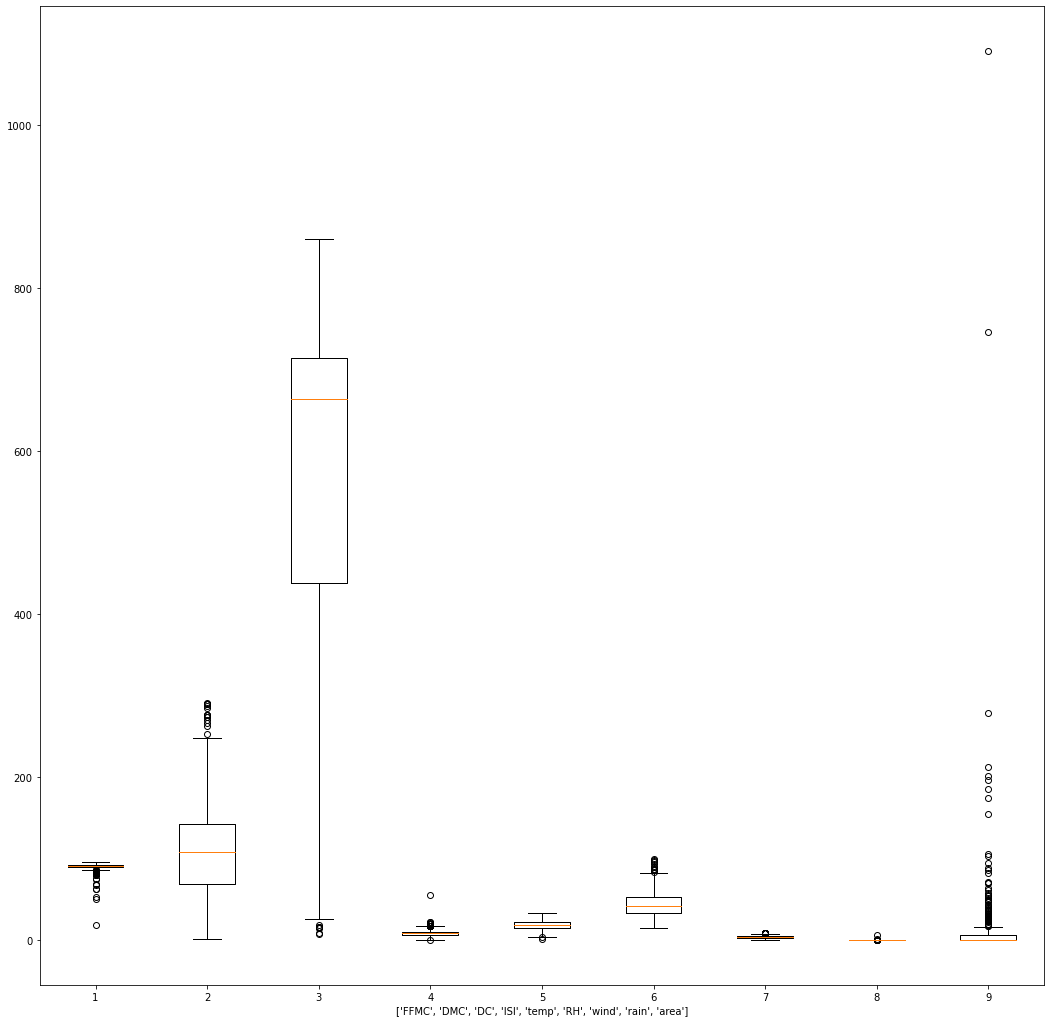

In [7]:
fig = plt.figure(figsize=(18,18))
plt.boxplot(original_data[numerical])
plt.xlabel(numerical)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

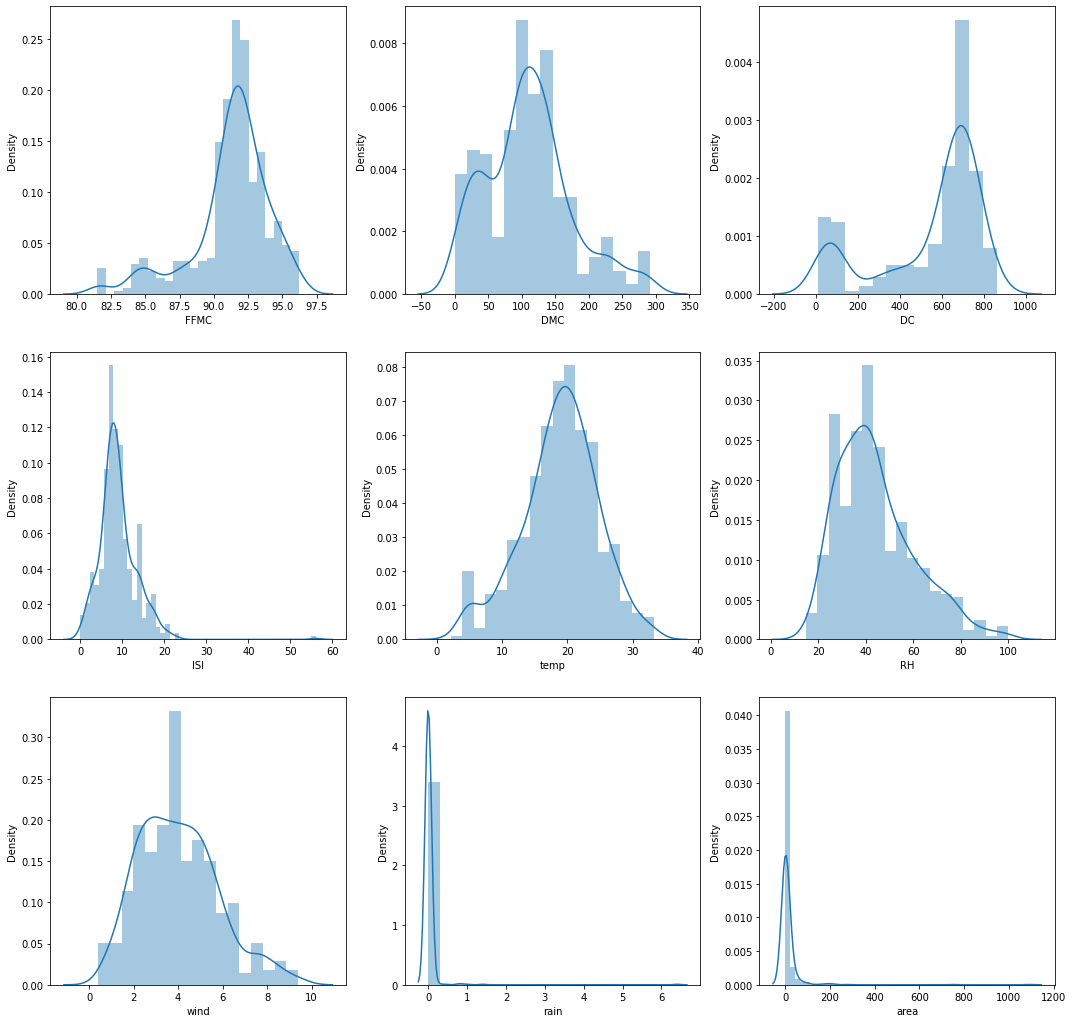

In [23]:
# distribution visulization for numerical columns :
fig, ax = plt.subplots(3,3, figsize=(18,18))
sns.distplot(original_data["FFMC"], ax=ax[0,0])
sns.distplot(original_data["DMC"], ax=ax[0,1])
sns.distplot(original_data["DC"], ax=ax[0,2])
sns.distplot(original_data["ISI"], ax=ax[1,0])
sns.distplot(original_data["temp"], ax=ax[1,1])
sns.distplot(original_data["RH"], ax=ax[1,2])
sns.distplot(original_data["wind"], ax=ax[2,0])
sns.distplot(original_data["rain"], ax=ax[2,1])
sns.distplot(original_data["area"], ax=ax[2,2])

In [24]:
# Remove outliers from data base on  distibution :
# original_data["ISI"] = original_data[original_data.ISI<40]
original_data["rain"] = original_data["rain"].loc[original_data.rain<2.5]
original_data["area"] = original_data["area"].loc[original_data.area<400]
# original_data.tail()
original_data["ISI"] = original_data["ISI"].loc[original_data.ISI < 40]

In [25]:
original_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [26]:
# after removing outliers check for null values :
original_data.isnull().sum()

month             0
day               0
FFMC             12
DMC               0
DC                0
ISI               1
temp              0
RH                0
wind              0
rain              1
area              2
size_category     0
dtype: int64

In [27]:
original_data = original_data.dropna(axis=0)

In [28]:
original_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [29]:
original_data.info()            # after removing outliers : (501, 12)
# we have decucted around 3.10 % of data considering it as outlier.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 515
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          501 non-null    object 
 1   day            501 non-null    object 
 2   FFMC           501 non-null    float64
 3   DMC            501 non-null    float64
 4   DC             501 non-null    float64
 5   ISI            501 non-null    float64
 6   temp           501 non-null    float64
 7   RH             501 non-null    int64  
 8   wind           501 non-null    float64
 9   rain           501 non-null    float64
 10  area           501 non-null    float64
 11  size_category  501 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 50.9+ KB


In [30]:
dummy_data = pd.get_dummies(original_data)
print(dummy_data.shape)        # (501, 29)

(501, 29)


In [31]:
dummy_data.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_oct',
       'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun', 'day_thu',
       'day_tue', 'day_wed', 'size_category_large', 'size_category_small'],
      dtype='object')

In [32]:
# Feature Selection Method : Tree Based feature selection 
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
y = dummy_data["area"]
x = dummy_data.drop(["area"], axis=1)

In [33]:
model.fit(x,y)
model.feature_importances_

array([4.79038388e-02, 6.28820296e-02, 4.60597453e-02, 1.65966431e-01,
       1.84136791e-01, 4.51931433e-02, 1.61895342e-01, 8.87543356e-06,
       0.00000000e+00, 1.03782713e-03, 5.73735952e-05, 5.38574457e-06,
       0.00000000e+00, 7.48022741e-05, 8.34567857e-07, 5.50884333e-06,
       0.00000000e+00, 6.27131974e-04, 8.86916463e-04, 7.37170311e-06,
       2.53567078e-04, 2.97137198e-04, 1.31211671e-05, 1.40253196e-05,
       1.35633929e-02, 1.61193413e-05, 2.69093289e-01, 0.00000000e+00])

In [34]:
import numpy as np
# to get columns index which has high impact to predict area :
l = model.feature_importances_>0.01
print("Index of columns which has high impact :", np.where(l==True))

Index of columns which has high impact : (array([ 0,  1,  2,  3,  4,  5,  6, 24, 26]),)


# Here, we can observe that individually month_august , month_september , month_july has high impact but in case of combining whole feature together month_april has high impact on area.

In [35]:
x.shape

(501, 28)

In [36]:
import keras
from sklearn.preprocessing import StandardScaler

In [37]:
# Standardization
a = StandardScaler()
a.fit(x)
x_standardized = a.transform(x)

In [38]:
pd.DataFrame(x_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
count,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02
mean,1.047288e-15,9.506700e-17,2.637611e-16,5.320650e-16,1.365065e-16,-6.739453e-17,-1.095888e-17,-4.568867e-16,1.094711e-16,-4.432028e-16,4.597121e-16,-2.348975e-17,-1.645113e-16,-1.030447e-16,4.176078e-16,-4.354468e-16,3.567783e-17,8.273488e-16,-2.393295e-16,7.202046e-17,2.193854e-16,-7.091245e-18,-1.850372e-17,1.061471e-16,-4.055306e-17,-1.839292e-17,4.092978e-16,-4.183834e-16
std,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00
min,-3.446938e+00,-1.728693e+00,-2.246798e+00,-1.838917e+00,-2.952649e+00,-1.825055e+00,-2.015866e+00,-1.018413e-01,-1.352504e-01,-7.520804e-01,-1.352504e-01,-1.816306e-01,-4.472136e-02,-2.568218e-01,-1.756821e-01,-3.439529e-01,-6.330889e-02,-1.756821e-01,-7.134677e-01,-4.488194e-01,-4.129900e-01,-4.326705e-01,-4.742772e-01,-3.688556e-01,-3.653548e-01,-3.475707e-01,-6.042538e-01,-1.654934e+00
25%,-3.319975e-01,-6.168275e-01,-3.637155e-01,-6.130064e-01,-5.788565e-01,-6.894483e-01,-7.324346e-01,-1.018413e-01,-1.352504e-01,-7.520804e-01,-1.352504e-01,-1.816306e-01,-4.472136e-02,-2.568218e-01,-1.756821e-01,-3.439529e-01,-6.330889e-02,-1.756821e-01,-7.134677e-01,-4.488194e-01,-4.129900e-01,-4.326705e-01,-4.742772e-01,-3.688556e-01,-3.653548e-01,-3.475707e-01,-6.042538e-01,-1.654934e+00
50%,1.635612e-01,-6.405367e-02,4.504792e-01,-1.788296e-01,5.415483e-02,-1.847344e-01,-7.016937e-03,-1.018413e-01,-1.352504e-01,-7.520804e-01,-1.352504e-01,-1.816306e-01,-4.472136e-02,-2.568218e-01,-1.756821e-01,-3.439529e-01,-6.330889e-02,-1.756821e-01,-7.134677e-01,-4.488194e-01,-4.129900e-01,-4.326705e-01,-4.742772e-01,-3.688556e-01,-3.653548e-01,-3.475707e-01,-6.042538e-01,6.042538e-01
75%,5.883258e-01,4.729266e-01,6.550549e-01,4.852054e-01,6.695825e-01,5.723365e-01,4.951953e-01,-1.018413e-01,-1.352504e-01,1.329645e+00,-1.352504e-01,-1.816306e-01,-4.472136e-02,-2.568218e-01,-1.756821e-01,-3.439529e-01,-6.330889e-02,-1.756821e-01,1.401605e+00,-4.488194e-01,-4.129900e-01,-4.326705e-01,-4.742772e-01,-3.688556e-01,-3.653548e-01,-3.475707e-01,1.654934e+00,6.042538e-01
max,1.756429e+00,2.824584e+00,1.256047e+00,3.473363e+00,2.515866e+00,3.474442e+00,3.006257e+00,1.477972e+01,7.393691e+00,1.329645e+00,7.393691e+00,5.505679e+00,2.236068e+01,3.893750e+00,5.692100e+00,2.907375e+00,1.579557e+01,5.692100e+00,1.401605e+00,2.228068e+00,2.421366e+00,2.311227e+00,2.108472e+00,2.711088e+00,2.737065e+00,2.877113e+00,1.654934e+00,6.042538e-01


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub

from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping

print(tf.version.VERSION)

2.4.1


In [41]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam, Adadelta

In [42]:
# create base_model :
import numpy as np
# Create the model :
kfold = KFold(n_splits=10)
def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=28, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(24, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    adam=Adam(lr=0.01)
#     optimizer = Adadelta()
# compile model :
    model.compile(loss='mean_squared_error', optimizer=adam)
    return model

my_model = create_model()
my_model.fit(np.array(x_standardized), np.array(y), epochs=100)
print("********************************done***********************************")

Epoch 1/100
16/16 [==============================] - 2s 2ms/step - loss: 868.3452
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 785.4457
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 421.9278
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 512.8991
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 304.1374
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 746.3382
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 467.0239
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 597.0610
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 336.7653
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 638.3935
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 429.3868
Epoch 12/100
16/16 [==============================] - 0s 2ms/step - loss: 326.9396
Epoch 13/100


In [43]:
from sklearn.metrics import accuracy_score
y_pred = my_model.predict(x_standardized)

Text(0.5, 1.0, 'Actual vs Prediction')

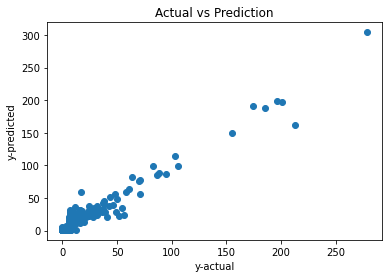

In [44]:
import matplotlib.pyplot as plt
plt.scatter(y, y_pred)
plt.xlabel("y-actual")
plt.ylabel("y-predicted")
plt.title("Actual vs Prediction")

In [45]:
from sklearn.metrics import r2_score
print(r2_score(y, y_pred))        # 95.16 % 

0.9516081113662879


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.25, random_state=7)
my_model.fit(np.array(x_train), np.array(y_train), epochs=500)

Epoch 1/500
12/12 [==============================] - 0s 2ms/step - loss: 147.8151
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 115.2039
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 93.1117
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 53.4116
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 40.7370
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 44.0320
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 47.9026
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 34.5478
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 39.9588
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 33.2126
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 31.9483
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 40.7282
Epoch 13/500
12/12 [===

In [47]:
y_train_pred = my_model.predict(x_train)

In [48]:
# training accuracy :
print(r2_score(y_train_pred, y_train))    # 99.25 %

0.9898580937203189


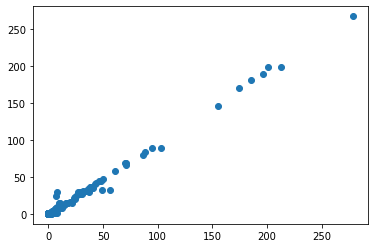

In [49]:
plt.scatter(y_train, y_train_pred)

In [50]:
# testing accuracy :
y_test_pred = my_model.predict(x_test)
print(r2_score(y_test_pred, y_test))    # 41.79 % 

0.4178618759481444


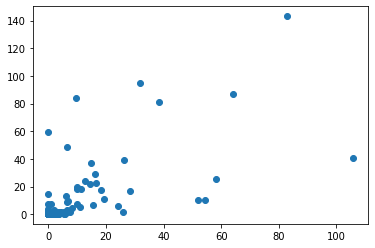

In [51]:
plt.scatter(y_test, y_test_pred)

In [52]:
# create general model which is use to find better parameter :
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer='normal'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam)
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10]
epochs = [100,200]
learning_rate = [0.001,0.01]
dropout_rate = [0.0,0.1]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [16,24]
neuron2 = [8,16]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(np.array(x_standardized),np.array(y))

print("------------------------------- Done -----------------------------")

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=-8.375, total=   4.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=-224.608, total=   6.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.5s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=-1766.132, total=   6.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.5s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=-616.370, total=   6.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.7s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8, score=-1091.854, total=   6.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=16 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   28.8s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=16, score=-89.412, total=   4.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=16 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   33.2s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=16, score=-224.506, total=   6.0s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=16 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   39.3s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=16, score=-2430.348, total=   5.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=16 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   45.1s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=16, score=-663.770, total=   5.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=16 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   51.0s remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=16, score=-1105.529, total=   6.4s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=24, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=24, neuron2=8, score=-41.427, total=   4.2s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=24, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=24, neuron2=8, score=-201.089, total=   5.9s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=24, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_ra

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed: 90.9min finished


------------------------------- Done -----------------------------


In [53]:
!nvidia-smi

Sat Feb 13 13:26:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    31W /  70W |    284MiB / 15109MiB |     25%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [54]:
# Summarize the results
print("------------------ Results-----------------------------------------------")
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))
print("********************* Done ************************")

------------------ Results-----------------------------------------------
Best : -636.102864074707, using {'activation_function': 'linear', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 200, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 16, 'neuron2': 16}
-741.4678470611573,631.3357957762752 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.001, 'neuron1': 16, 'neuron2': 8}
-902.7132400512695,843.0088381132393 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.001, 'neuron1': 16, 'neuron2': 16}
-821.2311431884766,737.7193171018745 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 100, 'init': 'uniform', 'learning_rate': 0.001, 'neuron1': 24, 'neuron2': 8}
-1036.7913345336915,1068.5999399177974 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 100,

In [56]:
# after applying general model get the best hyperparameters and make another model model_1 :
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer='normal'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam)
    return model

# Create the model

model_1 = KerasRegressor(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10]
epochs = [200]
learning_rate = [0.01]
dropout_rate = [0.1]
activation_function = ['linear']
init = ['normal']
neuron1 = [18]
neuron2 = [18]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model_1,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(np.array(x_standardized),np.array(y))

print("------------------------------- Done -----------------------------")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=200, init=normal, learning_rate=0.01, neuron1=18, neuron2=18 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=200, init=normal, learning_rate=0.01, neuron1=18, neuron2=18, score=-64.119, total=   8.8s
[CV] activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=200, init=normal, learning_rate=0.01, neuron1=18, neuron2=18 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV]  activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=200, init=normal, learning_rate=0.01, neuron1=18, neuron2=18, score=-291.567, total=  11.8s
[CV] activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=200, init=normal, learning_rate=0.01, neuron1=18, neuron2=18 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.6s remaining:    0.0s


[CV]  activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=200, init=normal, learning_rate=0.01, neuron1=18, neuron2=18, score=-1604.198, total=  11.9s
[CV] activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=200, init=normal, learning_rate=0.01, neuron1=18, neuron2=18 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   32.6s remaining:    0.0s


[CV]  activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=200, init=normal, learning_rate=0.01, neuron1=18, neuron2=18, score=-394.319, total=  11.6s
[CV] activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=200, init=normal, learning_rate=0.01, neuron1=18, neuron2=18 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   44.2s remaining:    0.0s


[CV]  activation_function=linear, batch_size=10, dropout_rate=0.1, epochs=200, init=normal, learning_rate=0.01, neuron1=18, neuron2=18, score=-1064.016, total=  11.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   55.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   55.5s finished


------------------------------- Done -----------------------------


In [57]:
# Summarize the results for new model :
print("------------------ Results-----------------------------------------------")
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))
print("********************* Done ************************")

------------------ Results-----------------------------------------------
Best : -683.6440032958984, using {'activation_function': 'linear', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 200, 'init': 'normal', 'learning_rate': 0.01, 'neuron1': 18, 'neuron2': 18}
-683.6440032958984,568.0399033751744 with: {'activation_function': 'linear', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 200, 'init': 'normal', 'learning_rate': 0.01, 'neuron1': 18, 'neuron2': 18}
********************* Done ************************


In [113]:
# apply hyperparameters to get better model :
import numpy as np
# Create the model :
kfold = KFold(n_splits=10)
def create_model():
    model = Sequential()
    model.add(Dense(40, input_dim=28, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(24, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    adam=Adam(lr=0.01)
#     optimizer = Adadelta()
# compile model :
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mse'])
    return model

final_model = create_model()
history = final_model.fit(np.array(x_standardized), np.array(y), epochs=500, batch_size=10, verbose=0)
print(history)
print("********************************done***********************************")

********************************done***********************************


In [114]:
mse_value, mae_value = final_model.evaluate(x_test, y_test, verbose=0)

print(mse_value)

11.771882057189941


In [115]:
# predict test data :
final_y_pred = final_model.predict(x_test)

In [116]:
# testing accuracy using final model:
r2_score(y_test, final_y_pred)                   # 95.52 % testing accuracy

0.9551750018750703

In [117]:
mse_value, mae_value = final_model.evaluate(x_train, y_train, verbose=0)

print(mse_value)

14.043214797973633


In [118]:
# predict training data
final_y_train_pred = final_model.predict(x_train)
# training accuracy using final model:
r2_score(y_train, final_y_train_pred)        # 98.49 % training accuracy

0.9849391784143038

In [119]:
print(history.history.keys())

dict_keys(['loss', 'mse'])


No handles with labels found to put in legend.


Text(0, 0.5, 'Loss')

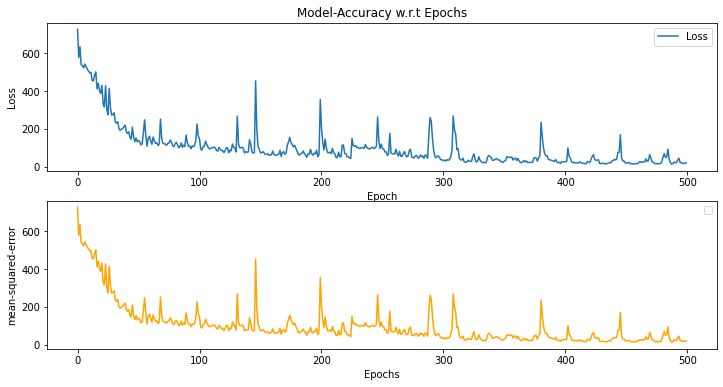

In [141]:
# visulize loss w.r.t epochs :
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6))
ax2.plot(history.history['mse'], color='orange')
ax2.legend(loc='upper right')
ax1.plot(history.history['loss'], label='Loss')
ax1.legend(loc="upper right")
ax1.set_title("Model-Accuracy w.r.t Epochs", loc='center')
plt.xlabel("Epochs")
plt.ylabel("mean-squared-error")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
